In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#Time Series Generation for q1

In [3]:
#Seeding

np.random.seed(20186913)

#price time series generation
n = 2000
t = np.linspace(0,n,n+1)
y = [100,100]
d = 0.025
theta= -0.4
phi = 0.6
epsilon = np.random.normal(loc = 0, scale = 1, size = n)
for i in range(1,n):
    yfin = y[i] + phi*(y[i] - y[i-1]) + epsilon[i] + theta*epsilon[i-1] + (1 - phi)*d
    y.append(yfin)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


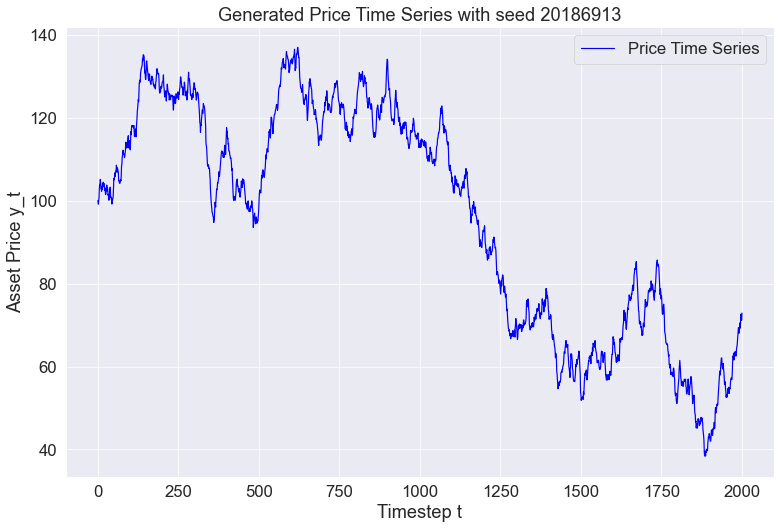

In [4]:
from matplotlib import pyplot

seasize = (12.7, 8.27)
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)
sns.set_context("paper", font_scale=1.9)
fig, ax = pyplot.subplots(figsize=seasize)

sns.lineplot(t, y, color='blue',  label='Price Time Series')  
plt.title('Generated Price Time Series with seed 20186913')
plt.xlabel('Timestep t')
plt.ylabel('Asset Price y_t')

plt.legend()
plt.show()

In [5]:
# Split price time series into 70-30 splits for train and test:
TrainingSet = y[1:int(len(y)*0.7)+1]
TestingSet = y[int(len(y)*0.70):]

In [6]:
len(TestingSet)

601

In [7]:
# Strategies for Training Set

In [8]:
# Buy & Hold from day 1
S = TrainingSet

print("Buy and Hold return : ",(S[-1]-S[0])/S[0])
Returns = [i/j for i,j in zip(S[1:],S[:-1])]
Returns.insert(0,1)
LogBH = [np.log(i) for i in Returns]
WarrenBuffet = [100*i for i in TrainingSet]


Buy and Hold return :  -0.26867101989496234


In [9]:
#Mean Reversion

#Our initial cash deposits
MRValue = [10000,10000]  

S = TrainingSet

time_window = 50
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 10000

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_average = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_average
  
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]

    if ma[i] > x: 

        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0

    if ma[i] < x:

        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0      

    ma[i+1] = S[len(S)-1]
    
    MRValue.append(cash[i+1]+x*w[i+1])

mean_strategy = [a*b for a,b in zip(w,S)]+ cash

print("Mean reversion return : ",(mean_strategy[-1]- mean_strategy[0])/ mean_strategy[0])

LogMeanValue = [np.log(i/j) for i,j in zip(MRValue[1:],MRValue[:-1])]

Mean reversion return :  -0.5464194227014236


In [10]:
#Trend Following
  
# Our initial Cash deposits
TFValue = [10000,10000]    
    
S = TrainingSet
    
time_window = 50
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 10000

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_average = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_average
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] < x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] > x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

    ma[i+1] = S[len(S)-1]
    
    TFValue.append(cash[i+1]+x*w[i+1])
        
trend_strategy = [a*b for a,b in zip(w,S)]+ cash
print("Trend following strategy's return : ",(trend_strategy[-1]- trend_strategy[0])/ trend_strategy[0])

LogTrendValue = [np.log(i/j) for i,j in zip(TFValue[1:],TFValue[:-1])]

Trend following strategy's return :  0.5349142710181881


C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


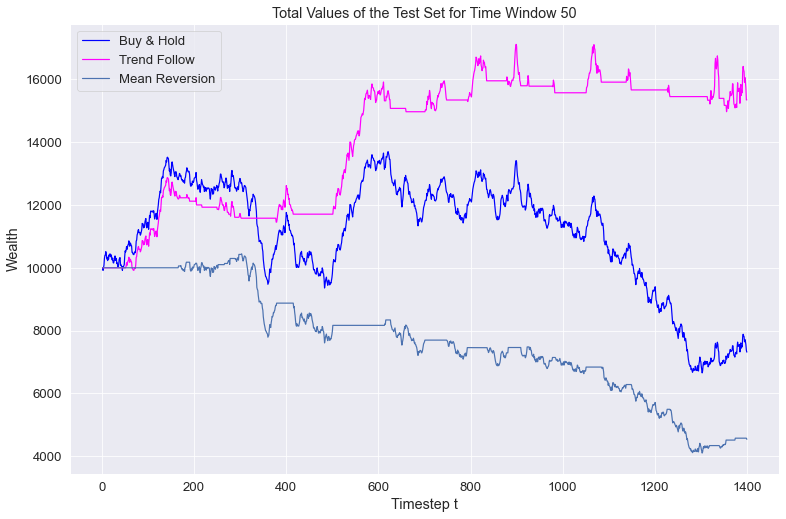

In [11]:
from matplotlib import pyplot
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.5)
#fig, axes = plt.subplots(1, 2, figsize=(15,8))
T=t[1:1401]
seasize = (12.7, 8.27)
fig, ax = pyplot.subplots(figsize=seasize)

plt.title('Total Values of the Test Set for Time Window 50')
plt.xlabel('Timestep t')
plt.ylabel('Wealth')

sns.lineplot(T,WarrenBuffet, color='blue', label='Buy & Hold') 
sns.lineplot(T,trend_strategy, color='fuchsia', label='Trend Follow')

sns.lineplot(T,mean_strategy, label='Mean Reversion')

#sns.lineplot(T,tf_strategy, color='fuchsia', label='Trend Follow')
plt.legend

#fig.legend(labels=['Las Vegas','Edinburgh'])
plt.show()

In [12]:
#Performance Indicators for Training Set

In [13]:
# Sharpe:
SharpeBH = np.mean(LogBH)/np.std(LogBH) # Buys and hold
SharpeTrend = np.mean(LogTrendValue)/np.std(LogTrendValue) # Trend following
SharpeMean = np.mean(LogMeanValue)/np.std(LogMeanValue) # Mean Reversion
print('Sharpe Ratio is :', SharpeBH, SharpeTrend, SharpeMean)

# Value at Risk
a = 0.05
VaRBH = np.quantile(LogBH, a)
VaRTrend = np.quantile(LogTrendValue, a)
VaRMean = np.quantile(LogMeanValue, a)
#print('Value at Risk:', VaRBH,VaRTrend,VaRMean)

#Shortfall
ShortfallBH = np.mean([i for i in LogBH if i < VaRBH])
TrendShortfall = np.mean([i for i in LogTrendValue if i < VaRTrend])
MeanShortfall = np.mean([i for i in LogMeanValue if i < VaRMean])
#print('Expected Shortfall:',ShortfallBH,TrendShortfall,MeanShortfall)

# Conditional Sharpe Ratio
CSRBH = np.mean(LogBH)/ShortfallBH
CStrend = np.mean(LogTrendValue)/TrendShortfall
CSMean = np.mean(LogMeanValue)/MeanShortfall


print('Conditional Sharpe Ratio:',CSRBH, CStrend, CSMean)

# MDD:
Maxima = max(TrainingSet)
Location = TrainingSet.index(Maxima)
MinThrough = min(TrainingSet[Location+1:])
MDD = (MinThrough - Maxima)/Maxima
#print('Maximum DrawDown is: ',"%0.3f" % MDD)

# Calmar:

CalmarBH = np.mean(LogBH)/MDD
CalmarTrend = np.mean(LogTrendValue)/MDD
CalmarMean = np.mean(LogMeanValue)/MDD


print('Calmar Ratio:',CalmarBH,CalmarTrend,CalmarMean)

Sharpe Ratio is : -0.022936272853028676 0.04971732414837234 -0.07672122449078708
Conditional Sharpe Ratio: 0.01113355181477922 -0.020437221715321016 0.030932642094255634
Calmar Ratio: 0.00043441189671842667 -0.0005948841935054226 0.001086612815726709


In [14]:
#Strategies for Testing Set

In [15]:
S = TestingSet
%precision %.2f
print("Long only inactive position's return : ",(S[-1]-S[0])/S[0])
Returns = [i/j for i,j in zip(S[1:],S[:-1])]
LogRTest = [np.log(i) for i in Returns]
WarrenBuffetTest = [100*i for i in TestingSet]

Long only inactive position's return :  -0.003185140193078256


In [16]:
#Mean Reversion
#Our initial cash deposits
MRValueTest = [10000]  

S = TestingSet

time_window = 50
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 10000

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_average = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_average
  
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]

    if ma[i] > x: 

        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0

    if ma[i] < x:

        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0      

    ma[i+1] = S[len(S)-1]
    
    MRValueTest.append(cash[i+1]+x*w[i+1])

mean_strategytest = [a*b for a,b in zip(w,S)]+ cash

print("Mean reversion return : ",(mean_strategytest[-1]- mean_strategytest[0])/ mean_strategytest[0])

LogMeanValueTest = [np.log(i/j) for i,j in zip(MRValueTest[1:],MRValueTest[:-1])]

Mean reversion return :  -0.13946288400776466


In [17]:
#Trend Following
  
# Our initial Cash deposits
TFValueTest = [10000]    
    
S = TestingSet
    
time_window = 50
cumsum = [0]

ma = np.zeros(np.shape(S))

w = np.zeros(np.shape(S))
cash = np.zeros(np.shape(S))

cash[0] = 10000

for i, x in enumerate(S[:-1], 0):
    cumsum.append(cumsum[i] + x)
    ma[i] = x
    if i>=time_window:
        moving_average = (cumsum[i] - cumsum[i-time_window])/(time_window)
        ma[i] = moving_average
    
    if ma[i] == x:
        w[i+1] = w[i]
        cash[i+1] = cash[i]
    
    if ma[i] < x: 
        w[i+1] = cash[i]/x  + w[i]
        cash[i+1] = 0
        
    if ma[i] > x:
        cash[i+1] = w[i]*x + cash[i]
        w[i+1] = 0

    ma[i+1] = S[len(S)-1]
    
    TFValueTest.append(cash[i+1]+x*w[i+1])
        
trend_strategytest = [a*b for a,b in zip(w,S)]+ cash
print("Trend following strategy's return : ",(trend_strategytest[-1]- trend_strategytest[0])/ trend_strategytest[0])

LogTrendValueTest = [np.log(i/j) for i,j in zip(TFValueTest[1:],TFValueTest[:-1])]

Trend following strategy's return :  0.3412004107716799


C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


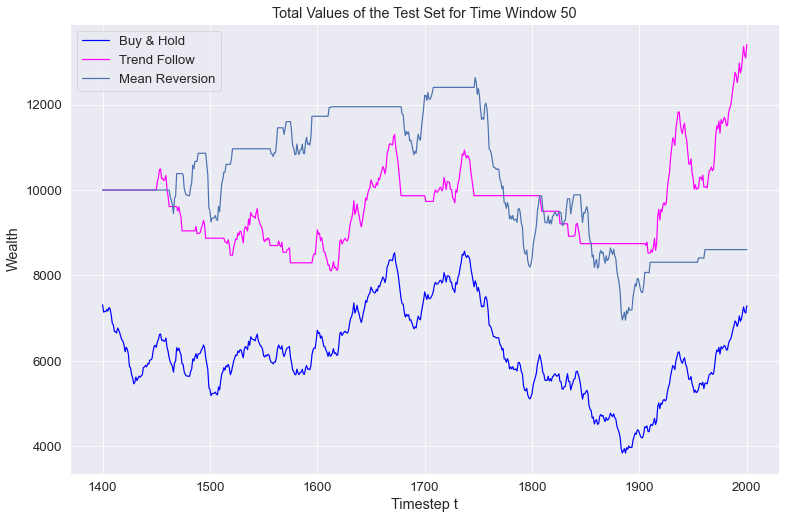

In [18]:
from matplotlib import pyplot
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.5)
#fig, axes = plt.subplots(1, 2, figsize=(15,8))
T=t[1400:]
seasize = (12.7, 8.27)
fig, ax = pyplot.subplots(figsize=seasize)

plt.title('Total Values of the Test Set for Time Window 50')
plt.xlabel('Timestep t')
plt.ylabel('Wealth')

sns.lineplot(T,WarrenBuffetTest, color='blue', label='Buy & Hold') 
sns.lineplot(T,trend_strategytest, color='fuchsia', label='Trend Follow')
sns.lineplot(T,mean_strategytest, label='Mean Reversion')

#sns.lineplot(T,tf_strategy, color='fuchsia', label='Trend Follow')
plt.legend

#fig.legend(labels=['Las Vegas','Edinburgh'])
plt.show()

In [19]:
T[-1]

2000.0

In [20]:
#Performance Indicators for Testing Set

In [21]:
# Sharpe:

SharpeTest = np.mean(LogRTest)/np.std(LogRTest) # buy and Hold
SharpeMeanTest = np.mean(LogMeanValueTest)/np.std(LogMeanValueTest) # Mean Reversion
SharpeTrendTest = np.mean(LogTrendValueTest)/np.std(LogTrendValueTest) # Trend following


print('Sharpe Ratio is :', SharpeTest, SharpeMeanTest, SharpeTrendTest)

# Value at Risk
a = 0.05

VaRTest = np.quantile(LogRTest, a)
VaRMeanTest = np.quantile(LogMeanValueTest, a)
VaRTrendTest = np.quantile(LogTrendValueTest, a)

# Expected Shortfall
ShortfallTest = np.mean([i for i in LogRTest if i < VaRTest])
ShortfallMeanTest = np.mean([i for i in LogMeanValueTest if i < VaRMeanTest])
ShortfallTrendTest = np.mean([i for i in LogTrendValueTest if i < VaRTrendTest])

# Conditional Sharpe Ratio
CSRBHTest = np.mean(LogRTest)/ShortfallTest
CSRMeanTest = np.mean(LogMeanValueTest)/ShortfallMeanTest
CSRTrendTest = np.mean(LogTrendValueTest)/ShortfallTrendTest


print('Conditional Sharpe Ratio:', CSRBHTest, CSRMeanTest, CSRTrendTest)

# Maximum Drawdown:
Maxima = max(TestingSet)
Location = TestingSet.index(Maxima)
MinThrough = min(TestingSet[Location+1:])
MDDTest = (MinThrough - Maxima)/Maxima


# Calmar Ratio:
CalmarTest = np.mean(LogRTest)/MDDTest
CalmarMeanTest = np.mean(LogMeanValueTest)/MDDTest
CalmarTrendTest = np.mean(LogTrendValueTest)/MDDTest


print('Calmar Ratio:', CalmarTest, CalmarMeanTest, CalmarTrendTest )

Sharpe Ratio is : -0.0002953691196443663 -0.01968265327641174 0.037884311021634066
Conditional Sharpe Ratio: 0.00013946047184833668 0.007144794841988178 -0.016042481531682064
Calmar Ratio: 9.63492150799734e-06 0.00045362058066652534 -0.00081438310667514
